In [1]:
import argparse
import os,sys
sys.path.append("/DB")
import scjp
import scanpy as sc

## Load scRNA data from CCA

In [2]:
path = 'data/'
adata = sc.read(path+'CCA_Lung_subset.h5ad')
adata

AnnData object with n_obs × n_vars = 482351 × 36601
    obs: 'n_counts', 'n_genes', 'mito', 'Dataset', 'Organ_orig', 'Organ', 'Sample', 'Patient', 'Subtype', 'Tissue_site', 'Tissue', 'CancerType', 'DataOrgTis', 'PtOrgTis', 'SpOrgTis', 'leiden', 'cnv_status', 'cnv_leiden', 'cnv_score', 'cell_type_major', 'cell_type_subset'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'start', 'end', 'gene_id', 'gene_name'
    uns: 'anno_2212_colors', 'anno_cat_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_cnv', 'X_cnv_pca', 'X_cnv_umap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'cnv_neighbors_connectivities', 'cnv_neighbors_distances', 'connectivities', 'distances'

In [3]:
adata.obs['cell_type_subset'].value_counts()

cell_type_subset
TandNK                 198927
Myeloid                131662
tumor                   48709
B                       40660
Epithelial              40226
Fibro_Peri              12177
activated_capillary      4077
Immature_Phenotype       2267
capillary_I              1609
capillary_II              787
Tip_Cells                 721
Activated_EC              529
Name: count, dtype: int64

## Geometric sketch for sub-sampling

In [4]:
# adata.raw = adata
# cell_cnt_min = adata.obs['cell_type_subset'].value_counts().min()

# sketch_index = scjp.get_sketch(adata,'cell_type_subset',folds=330,how='pd',min_num_per_key=cell_cnt_min)
# adsketch = adata[sketch_index].copy()

In [5]:
adsketch.obs['cell_type_subset'].value_counts()

TandNK                 1185
tumor                  1047
Myeloid                1039
Epithelial             1020
B                      1013
Fibro_Peri              971
activated_capillary     926
Immature_Phenotype      875
capillary_I             860
capillary_II            679
Tip_Cells               660
Activated_EC            529
Name: cell_type_subset, dtype: int64

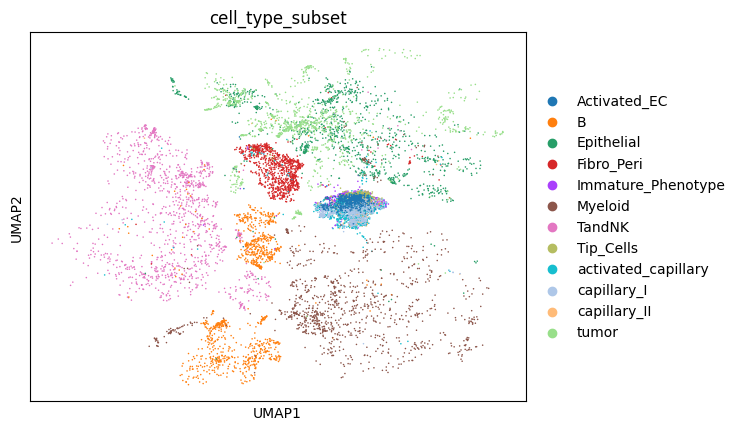

In [6]:
sc.pl.umap(adsketch,color=['cell_type_subset'], size=5)

In [7]:
adsketch.write('data/CCA_Lung_geosketch.h5ad')